In [1]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from FeatureExtractor.extractor import extract

classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

In [2]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Loading Training Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

print("Successfully loaded Training Data...")

Successfully loaded Training Data...


In [9]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Training
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# From the dataset shared with us and the paper on HAR by UCI,
# we understood certain features that were to be used and used
# as many features as we could understand and create from the 
# data obtained from MakeDataset.py. We thus created a package
# FeatuerExtractor that contains the function 'extract' that 
# creates these features from the raw data.
Xtrain = extract(X_train)
Recognizer = tree.DecisionTreeClassifier(random_state=43)
Recognizer = Recognizer.fit(Xtrain, y_train)
print("Descision Tree Trained Successfully!")


Descision Tree Trained Successfully!


Successfully loaded Test Data...
Accuracy of the Decision Tree model is (max_depth == None):  0.75
Displaying Confusion Matrix...


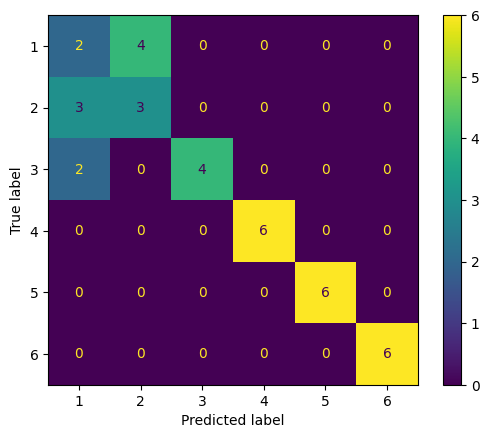

In [10]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Testing
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

print("Successfully loaded Test Data...")

Xtest = extract(X_test)
y_pred = Recognizer.predict(Xtest)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of the Decision Tree model is (max_depth == None): ",accuracy)
con_mat = confusion_matrix(y_test,y_pred, labels=Recognizer.classes_)
print("Displaying Confusion Matrix...")
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=Recognizer.classes_)
disp.plot()
plt.show()

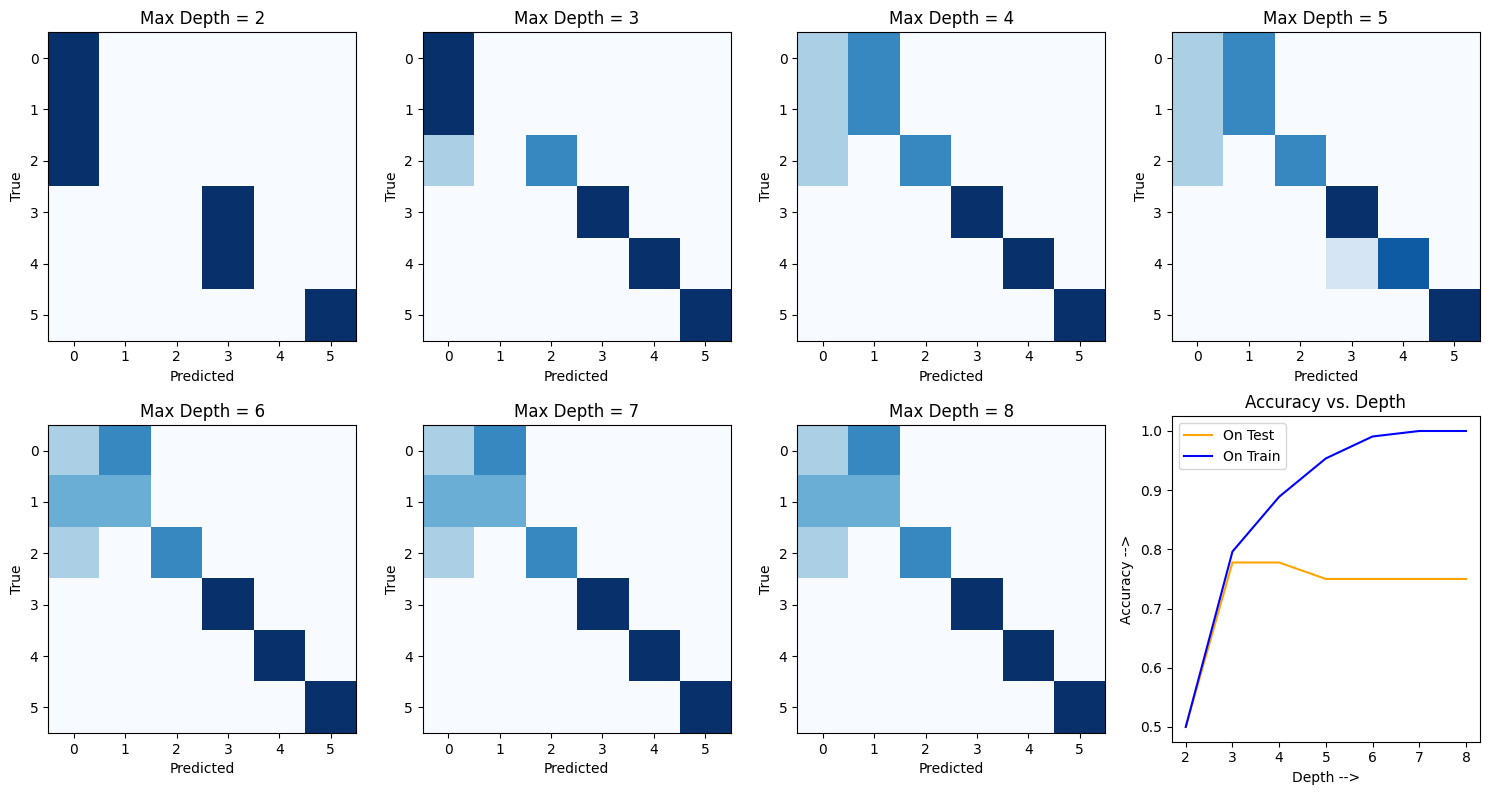

In [14]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Tuning
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

acc_vals = []
acc_vals_ontrain = []
con_mats = []
depths = [i for i in range(2,9)]
for depth in depths:
    Recognizer = tree.DecisionTreeClassifier(max_depth=depth, random_state=43)
    Recognizer = Recognizer.fit(Xtrain, y_train)
    y_pred = Recognizer.predict(Xtest)
    y_pred_ontrain = Recognizer.predict(Xtrain)
    acc_vals.append(accuracy_score(y_test,y_pred))
    acc_vals_ontrain.append(accuracy_score(y_train,y_pred_ontrain))
    con_mats.append(confusion_matrix(y_test,y_pred, labels=Recognizer.classes_))

### Plotting the data
num_plots = len(depths)

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
for i in range(num_plots):
    axs[i//4, i%4].imshow(con_mats[i], cmap='Blues', interpolation='nearest')
    axs[i//4, i%4].set_title(f"Max Depth = {depths[i]}")
    axs[i//4, i%4].set_xlabel('Predicted')
    axs[i//4, i%4].set_ylabel('True')

axs[1, 3].plot(depths, acc_vals, color='orange',label='On Test')
axs[1, 3].plot(depths, acc_vals_ontrain, color='blue',label='On Train')
axs[1, 3].set_title('Accuracy vs. Depth')
axs[1, 3].set_xlabel('Depth -->')
axs[1, 3].set_ylabel('Accuracy -->')
axs[1, 3].legend()
plt.tight_layout()
plt.show()

---
From the waveform that is plotted, we can see that accuracies change with changing depth. As the depth increases, the accuracy increases up to a certain value and then begins to decrease. This because after a particular depth (3 or 4 here), the model fits on the train set a little too well causing high variance and hence a drop in the accuracy in the test set.